# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Now let's try some Kinetic Monte Carlo

We wish to implement a Kinetic Monte Carlo algorithm to simulate the same situation. See https://en.wikipedia.org/wiki/Kinetic_Monte_Carlo for details.

We'll assume the numbers of rabbits and foxes (starting at 400 and 200) are actual rabbits and foxes, not "rabbit densities" for example, and so must always remain integers: you can't have half a rabbit or half a fox.

There are four events, with rates that are straightforward to calculate, so the rejection-free algorithm is suitable:
* `rabbit_birth = k1 * rabbits`
* `rabbit_death = k2 * rabbits * foxes`
* `fox_birth = k3 * rabbits * foxes`
* `fox_death = k4 * foxes`


Use a Kinetic Monte Carlo simulation(s) running for 600 days to determine
1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. if there's a peak that's  >200 days and >100 foxes)
2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).
3. The probability that the foxes die out before 600 days are complete

Make sure you've done enough simulations to be suitably confident in your answers (given the precision you think appropriate).

# Your turn!

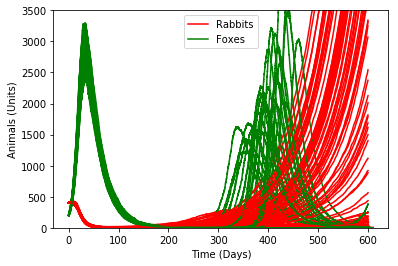

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  2 11:58:39 2018

@author: Bhavya
"""

import numpy as np
from matplotlib import pyplot as plt
import random
random.seed(1)

k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
tfinal = 600

def alleqns(rabbits, foxes):
    rabbit_b = k1 * rabbits
    rabbit_d = k2 * rabbits * foxes
    fox_b = k3 * rabbits * foxes
    fox_d = k4 * foxes
    rates = (rabbit_b, rabbit_d, fox_b, fox_d)
    return rates 



#dead foxes
df = 0
#dead rabbits 
dr = 0
#all dead
grimreaper = 0

loops = 100
#initially I declared my rs,fs and ts here but I kept running into numpy.ndarray error,
#so, I moved it inside the for loop

#for loop
#rs.append(r)
#fs.append(f)
for i in range(loops):
    ind= 0
    rs = []
    fs = []
    ts = []
    t = 0
    r = 400.
    f = 200.
    rs.append(r)
    fs.append(f)
    ts.append(t)
#print (rs)
    while t<tfinal:
        y = alleqns(rs[ind], fs[ind])
    #print (y)
        
    #cumulative stuff
        (rabbit_b, rabbit_d, fox_b, fox_d) = rates = y
        sumrate = sum(rates)
        #initially I put this at the end but I still kept running into zero division error
        if sumrate == 0:
            break
        RB= rabbit_b
        RD = RB+rabbit_d
        FB = RD+fox_b
        FD = FB+fox_d
        #choosing a random probability
        choice = random.uniform(0, sumrate)
        #KMC steps to see where uQ is
        if choice < RB:
            #rabbit born
            rs.append(rs[ind]+1)
            fs.append(fs[ind])
            #need a value to store how many rabbits were born
        else:
            if RB<=choice<RD:
                #rabbit dies
                rs.append(rs[ind]-1)
                fs.append(fs[ind])   
                #need a value to store how many rabbits died
            else:
                if RD<=choice<FB:
                    #foxes born
                    rs.append(rs[ind])
                    fs.append(fs[ind]+1)
                    #need a value to store how many foxes were born
                else:
                    if FB<=choice<FD:
                        #fox dies
                        rs.append(rs[ind])
                        fs.append(fs[ind]-1)
                    #need a value to store how many foxes died
        ind = ind+1 
        
            #t change step in kmc
        dt = random.expovariate(sumrate)
        t = t+dt
        ts.append(t)
    #change everything to arrays to graph
    rs = np.array(rs)
    fs = np.array(fs)
    ts = np.array(ts)
    
   
    plt.plot(ts, rs, 'r')
    plt.plot(ts, fs, 'g')
    #plt.ylim(0,3500)
    plt.legend(['Rabbits','Foxes'],loc="best")
    plt.ylim(0,3500)
    plt.xlabel('Time (Days)')
    plt.ylabel('Animals (Units)')
#need to plot everything in one graph
plt.show()
    #break        
    #second peak
    #if t>200, dF/dt whould be 0. Need to find t then. 
    #dFdt = fox_birth-foxdeath
    #solve dfdt and store it into 
    #if t>200 & dFdt = 0
    
    #OR find maxf's after t is 200
        
    
            
        
        
        
        
    

